In [122]:
#변수정리
#category: 전체 품목
#data_mod[폼목인덱스][날짜인덱스]: 전체 품목 날짜별 kg당 가격
#category_61: 빈 날짜 없는 품목
#data_mod_61: 빈 날짜 없는 가격 데이터

In [110]:
#import library
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [59]:
#실행하고 파일선택 누른 뒤 farm_data
from google.colab import files
uploaded = files.upload()

Saving farm_data.csv to farm_data.csv


In [60]:
#함수선언
def find_idx(cate,name):
  for i in range(len(cate)):
    if cate[i]==name:
      return i
  return -1

In [61]:
#데이터 불러오기
data=pd.read_csv("farm_data.csv")

In [62]:
#초기화
data_mod = [[0 for col in range(200)] for row in range(370)]
category=[]
temp = 'a'
temp_sum=0
temp_num=0

In [63]:
#계산
for i in range(len(data)):
  if temp!=data['품목'][i]:
    if i!=0:
      data_mod[idx_category][idx_date] = temp_sum/temp_num
      temp_sum=0
      temp_num=0
      temp=data['품목'][i]

  idx_date=datetime.strptime(str(data['일자'][i]), "%Y%m%d")-datetime.strptime('20210713', "%Y%m%d")
  idx_date=idx_date.days
  if find_idx(category,data['품목'][i])==-1:
    category.append(data['품목'][i])
    idx_category=len(category)-1
  else:
    idx_category=find_idx(category,data['품목'][i])

  temp_sum+=data['금액(원)'][i]/data['물량(kg)'][i]
  temp_num+=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


In [98]:
#이름으로 인덱스 찾기
find_idx(category,'바나나')

92

In [84]:
#품목 종류 출력
category

['안스리움',
 '참당귀',
 '기타',
 '애느타리버섯',
 '새송이',
 '만가닥',
 '팽이버섯',
 '표고버섯',
 '양송이',
 '느타리버섯',
 '새싹',
 '방풍나물',
 '참나물',
 '취나물',
 '잎당귀',
 '로메인',
 '식용허브',
 '파프리카',
 '비타민',
 '아스파라가스',
 '콜라비(순무양배추)',
 '칼리플라워(꽃양배추)',
 '비트(붉은사탕무우)',
 '빈스',
 '파세리(향미나리)',
 '케일',
 '브로코리(녹색꽃양배추)',
 '적채',
 '셀러리(양미나리)',
 '치커리',
 '피망(단고추)',
 '양상추',
 '생강',
 '마늘',
 '홍고추',
 '꽈리고추',
 '풋고추',
 '실파',
 '쪽파',
 '대파',
 '양파',
 '당근',
 '알타리무',
 '무',
 '겨자잎',
 '고수',
 '겨자채',
 '무순',
 '청경채',
 '돗나물',
 '호박잎',
 '고추잎',
 '머위대',
 '고들빼기',
 '비름',
 '고구마순',
 '아욱',
 '근대',
 '갓',
 '쑥갓',
 '깻잎',
 '부추',
 '미나리',
 '시금치',
 '열무',
 '상추',
 '양배추',
 '얼갈이배추',
 '배추',
 '박',
 '가지',
 '호박',
 '오이',
 '방울토마토',
 '메론',
 '딸기',
 '토마토',
 '참외',
 '수박',
 '블루베리',
 '용과',
 '체리',
 '듀리안',
 '리치',
 '망고스턴',
 '망고',
 '아보카도',
 '자몽',
 '오렌지',
 '레몬',
 '감귤',
 '파인애플',
 '바나나',
 '참다래(키위)',
 '살구',
 '자두',
 '복숭아',
 '포도',
 '배',
 '사과',
 '고구마',
 '감자',
 '옥수수',
 '강낭콩',
 '콩',
 '아스파라거스',
 '수삼',
 '목이',
 '곤달비',
 '민들레',
 '더덕',
 '참죽나무순',
 '두릅',
 '쌈채',
 '연근',
 '속새',
 '코코넛',
 '야자',
 '무화과',
 '매실',
 '완두',
 '고사리',
 '패션

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


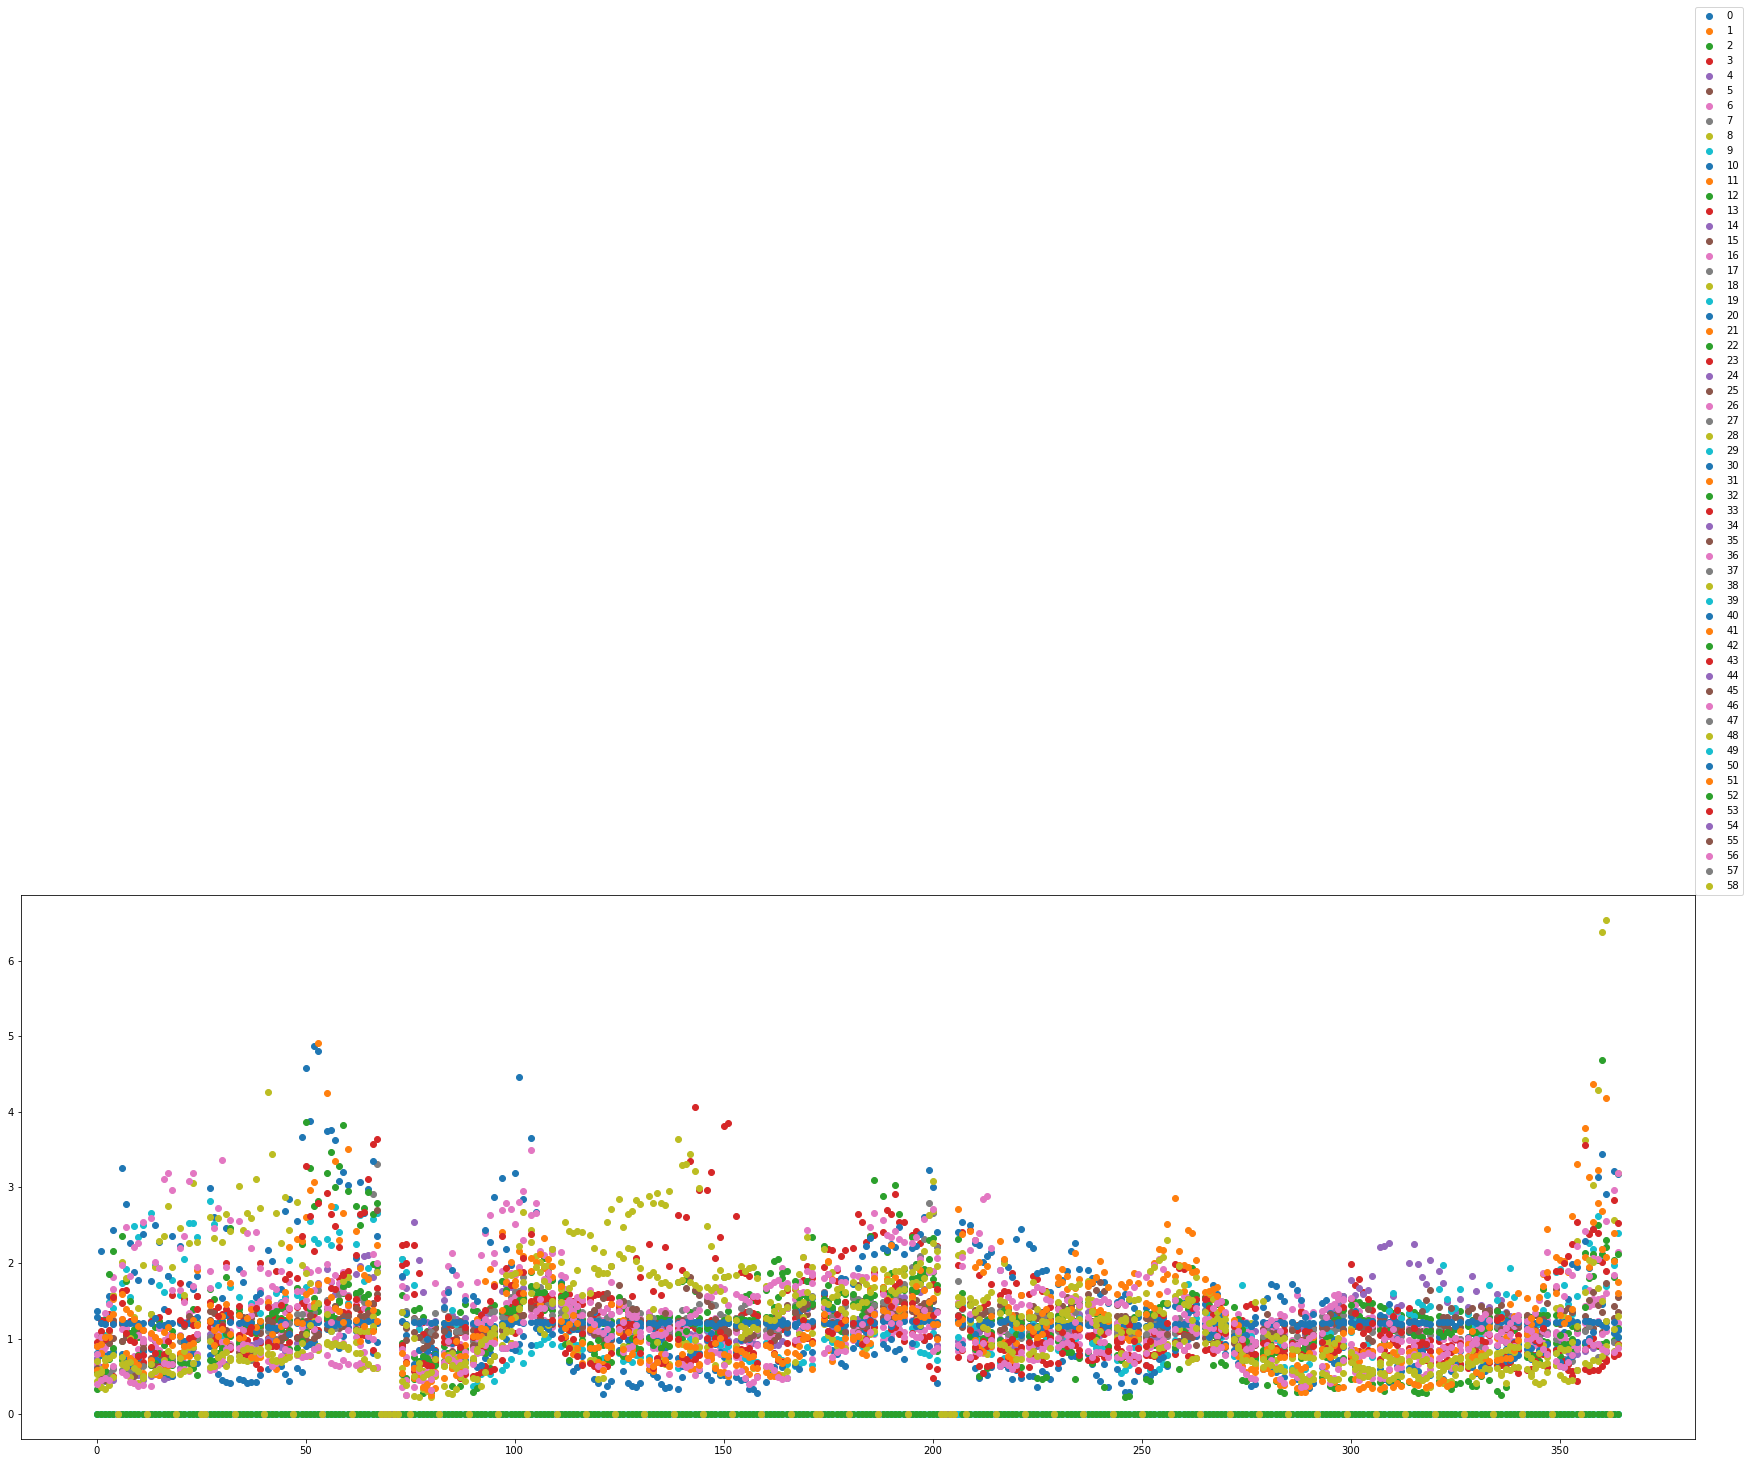

In [121]:
#그래프 출력 (알아서 바꿔서)
plt.figure(figsize=(30,10))
for i in range(len(category_61)):
  plt.plot(data_mod_61[i][0:365]/(sum(data_mod_61[i])/365),'o',label=i)
plt.legend(loc=(1.0, 1.0))
plt.show()

In [118]:
#빈 날짜 없는 것 고르기
temp=0
data_mod_61=[]
category_61=[]
for i in range(len(category)):
  for j in range(365):
   if data_mod[i][j]==0:
     temp+=1
  if temp==61:
    data_mod_61.append(data_mod[i])
    category_61.append(category[i])
  temp=0

